In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append("~/nest/lib/python3.6/site-packages/") #
import nest

print(plt.style.available)
plt.style.use('seaborn-poster')


['seaborn-muted', 'classic', 'seaborn-dark-palette', 'grayscale', 'seaborn-notebook', 'seaborn-white', 'seaborn-talk', 'ggplot', 'seaborn-whitegrid', 'dark_background', 'seaborn-poster', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-colorblind', 'seaborn-pastel', 'fivethirtyeight', 'seaborn-ticks', 'seaborn-dark', 'Solarize_Light2', 'bmh', '_classic_test', 'seaborn', 'seaborn-bright', 'seaborn-paper', 'fast']


List all modules

In [3]:
dir(nest)

['BeginSubnet',
 'CGConnect',
 'CGParse',
 'CGSelectImplementation',
 'CONN_LEN',
 'ChangeSubnet',
 'Cleanup',
 'Connect',
 'ConnectionRules',
 'CopyModel',
 'Create',
 'CurrentSubnet',
 'DataConnect',
 'DisableStructuralPlasticity',
 'Disconnect',
 'DisconnectOneToOne',
 'EnableStructuralPlasticity',
 'EndSubnet',
 'GetChildren',
 'GetConnections',
 'GetDefaults',
 'GetKernelStatus',
 'GetLID',
 'GetLeaves',
 'GetNetwork',
 'GetNodes',
 'GetStatus',
 'GetStructuralPlasticityStatus',
 'Install',
 'LayoutNetwork',
 'Models',
 'NESTEngine',
 'NESTError',
 'NumProcesses',
 'Prepare',
 'PrintNetwork',
 'Rank',
 'ResetKernel',
 'ResetNetwork',
 'ResumeSimulation',
 'Run',
 'RunManager',
 'SLIDatum',
 'SLILiteral',
 'SetAcceptableLatency',
 'SetDefaults',
 'SetKernelStatus',
 'SetMaxBuffered',
 'SetNumRecProcesses',
 'SetStatus',
 'SetStructuralPlasticityStatus',
 'Simulate',
 'SuppressedDeprecationWarning',
 'Template',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',

Consult for help

In [4]:
nest.Models?

Help desk can be used in browser given the correct configuration

In [14]:
nest.helpdesk()

NEST help needs to know where NEST is installed.Please source nest_vars.sh or define NEST_DOC_DIR manually.


## Hello World

Nodes:
1. Neurons
2. Devices
3. Subnetworks

In [4]:
neuron = nest.Create("iaf_psc_alpha")

In [5]:
nest.GetStatus(neuron)

({'C_m': 250.0,
  'Ca': 0.0,
  'E_L': -70.0,
  'I_e': 0.0,
  'V_m': -70.0,
  'V_min': -inf,
  'V_reset': -70.0,
  'V_th': -55.0,
  'archiver_length': 0,
  'beta_Ca': 0.001,
  'element_type': <SLILiteral: neuron>,
  'frozen': False,
  'global_id': 1,
  'local': True,
  'local_id': 1,
  'model': <SLILiteral: iaf_psc_alpha>,
  'node_uses_wfr': False,
  'parent': 0,
  'recordables': (<SLILiteral: I_syn_ex>,
   <SLILiteral: I_syn_in>,
   <SLILiteral: V_m>,
   <SLILiteral: weighted_spikes_ex>,
   <SLILiteral: weighted_spikes_in>),
  'supports_precise_spikes': False,
  'synaptic_elements': {},
  't_ref': 2.0,
  't_spike': -1.0,
  'tau_Ca': 10000.0,
  'tau_m': 10.0,
  'tau_minus': 20.0,
  'tau_minus_triplet': 110.0,
  'tau_syn_ex': 2.0,
  'tau_syn_in': 2.0,
  'thread': 0,
  'thread_local_id': -1,
  'vp': 0},)

In [10]:
nest.GetStatus(neuron, "I_e"),\
nest.GetStatus(neuron, ["V_reset", "V_th"])

((0.0,), ((-70.0, -55.0),))

In [11]:
nest.SetStatus(neuron, {"I_e": 376.0})

In [12]:
nest.GetStatus(neuron, "I_e")

(376.0,)

In [13]:
multimeter = nest.Create("multimeter")

In [14]:
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})

In [15]:
spikedetector = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

In [16]:
nest.Connect(multimeter, neuron)

In [17]:
nest.Connect(neuron, spikedetector)

In [18]:
nest.Simulate(1000.0)

In [40]:
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]


In [42]:
plt.subplot(2,1,1)
plt.plot(ts, Vms)

In [43]:

dSD = nest.GetStatus(spikedetector,keys="events")[0]
evs = dSD["senders"]
ts = dSD["times"]

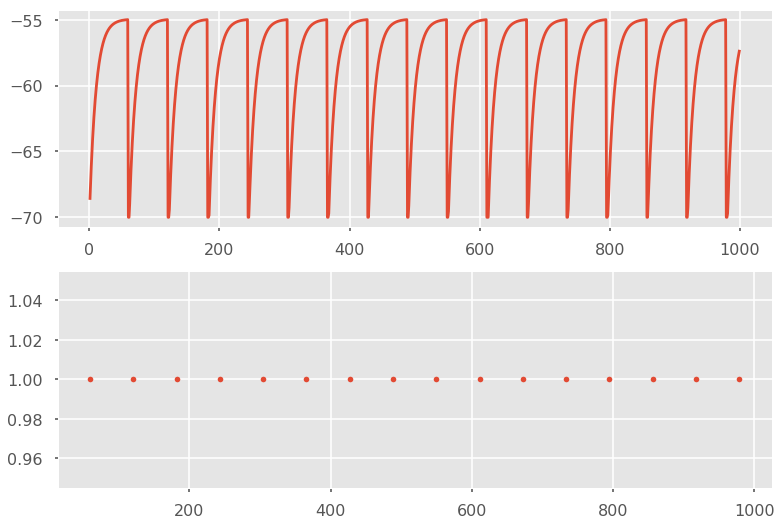

In [44]:
plt.subplot(2,1,2)
plt.plot(ts, evs, ".")
plt.show()